# Snowflake & Cronos - Analiza evoluției pieței de capital din perspectiva eficienței informaționale în formă slabă

##### Realizați o analiză comparativă pentru ipoteza de random walk în cazul unei acțiuni și al unei criptomonede.


##### Cum s-ar putea testa ipoteza de eficiență în forma semi-tare? Puteți exemplifica?

##### Snowflake Inc. provides a cloud-based data platform in the United States and internationally.
##### Cronos USD (CRO-USD)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [31]:
#  Preluarea datelor
tickerSymbol_cronos = 'CRO-USD'
tickerSymbol_snowflake = 'SNOW'

In [32]:
# get the data on each ticker
tickerData_cronos = yf.Ticker(tickerSymbol_cronos)
tickerData_snowflake = yf.Ticker(tickerSymbol_snowflake)

In [33]:
# get the historical prices for each ticker
df_cronos = tickerData_cronos.history(period='1d', start='2021-11-1', end='2022-11-1')
df_snowflake = tickerData_snowflake.history(period='1d', start='2021-11-1', end='2022-11-1')

In [34]:
# Preturile criptomonedei Cronos in perioada 1 noiembrie 2021 - 1 noiembrie 2022
df_cronos

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-01 00:00:00+00:00,0.212114,0.217195,0.197443,0.212706,327643711,0,0
2021-11-02 00:00:00+00:00,0.213892,0.256272,0.211417,0.255208,347328121,0,0
2021-11-03 00:00:00+00:00,0.254311,0.271406,0.243347,0.269238,345760830,0,0
2021-11-04 00:00:00+00:00,0.269187,0.299905,0.256416,0.287468,493286077,0,0
2021-11-05 00:00:00+00:00,0.287644,0.409059,0.281592,0.379995,1462024823,0,0
...,...,...,...,...,...,...,...
2022-10-27 00:00:00+00:00,0.112394,0.114256,0.109182,0.110010,36541666,0,0
2022-10-28 00:00:00+00:00,0.110004,0.112885,0.108794,0.112380,38114843,0,0
2022-10-29 00:00:00+00:00,0.112356,0.114364,0.110577,0.110750,44264544,0,0


In [35]:
# Preturile actiunilor snowflake in perioada 1 noiembrie 2021 - 1 noiembrie 2022
df_snowflake

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-01 00:00:00-04:00,353.839996,359.070007,351.579987,357.730011,2139100,0,0
2021-11-02 00:00:00-04:00,359.420013,363.790009,355.220001,359.640015,1582800,0,0
2021-11-03 00:00:00-04:00,356.000000,357.404999,346.359985,353.140015,2566000,0,0
2021-11-04 00:00:00-04:00,354.799988,358.049988,351.010010,356.790009,1468400,0,0
2021-11-05 00:00:00-04:00,357.929993,365.790009,357.279999,364.799988,2103100,0,0
...,...,...,...,...,...,...,...
2022-10-25 00:00:00-04:00,177.250000,183.460007,176.210007,181.820007,3652100,0,0
2022-10-26 00:00:00-04:00,169.800003,179.580002,167.779999,169.449997,6574100,0,0
2022-10-27 00:00:00-04:00,171.639999,175.179993,168.100006,169.110001,4082200,0,0


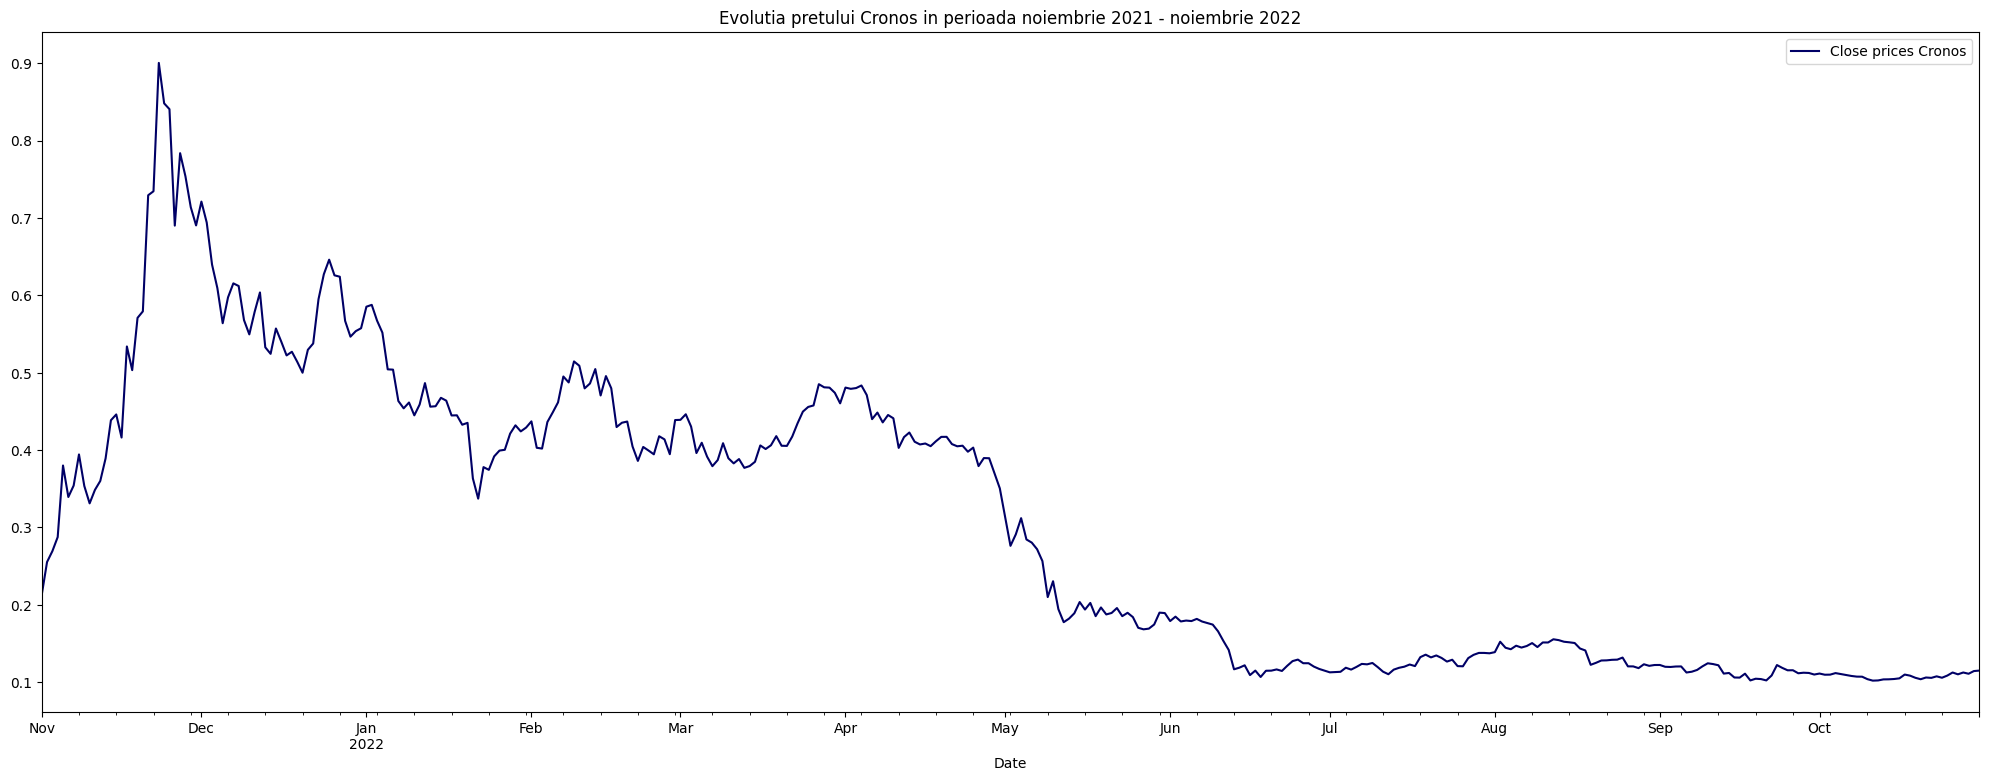

In [41]:
# Evolutia pretului Cronos in perioada noiembrie 2021 - noiembrie 2022
plt.figure(figsize=(25, 9), dpi=100)

df_cronos['Close'].plot(label='Close prices Cronos', color = '#000066')

plt.title('Evolutia pretului Cronos in perioada noiembrie 2021 - noiembrie 2022')
plt.xlabel('Date')
plt.legend()

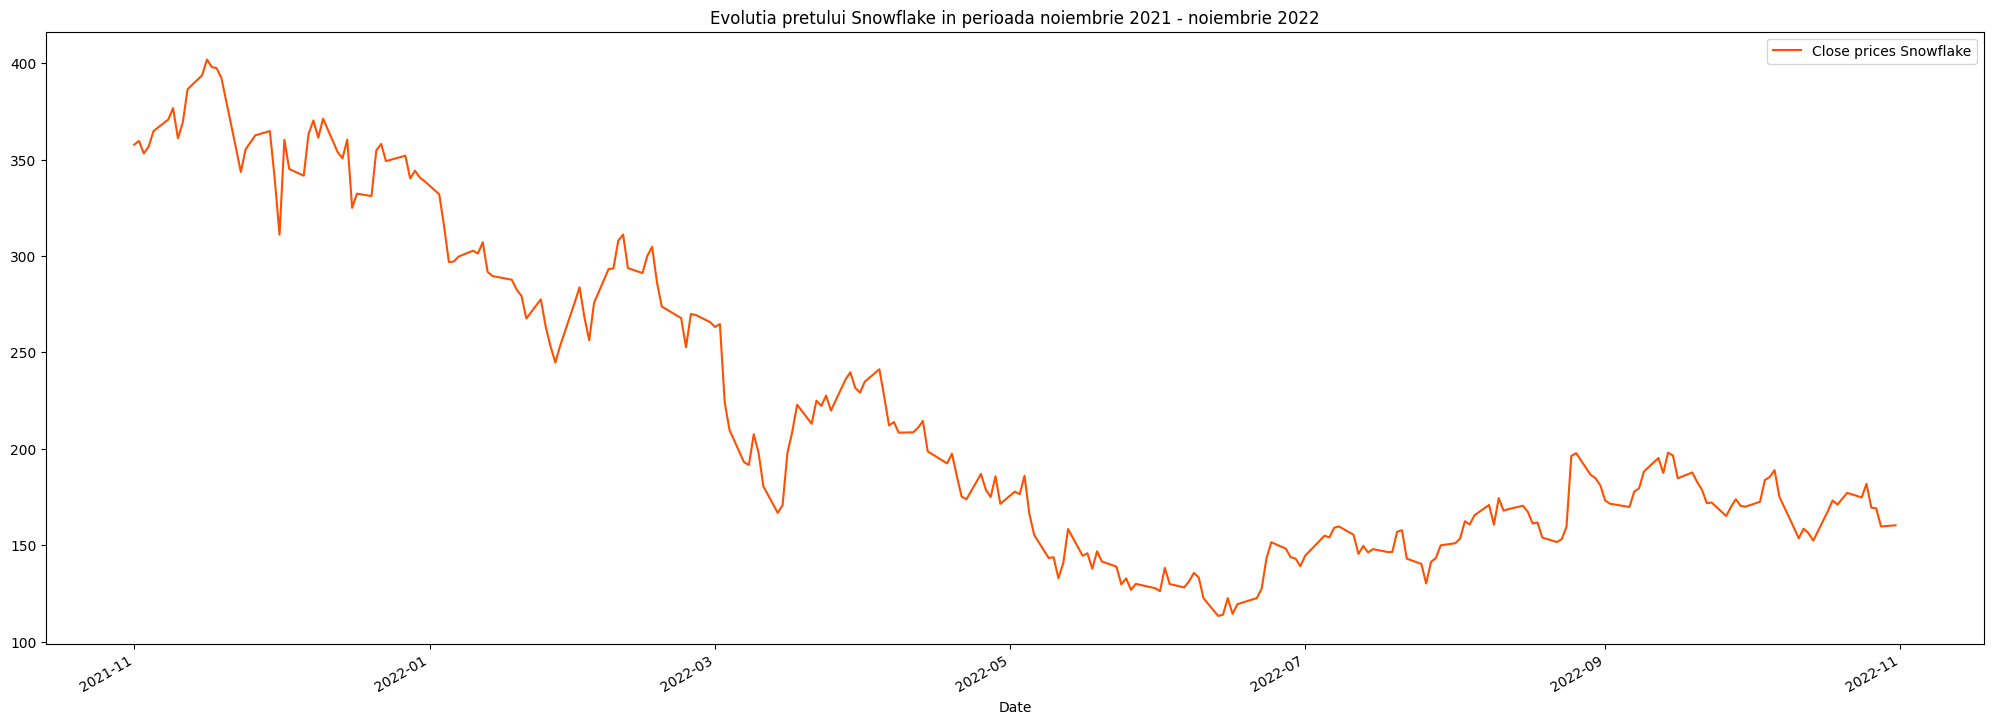

In [44]:
# Evolutia pretului Snowflake in perioada noiembrie 2021 - noiembrie 2022
plt.figure(figsize=(25, 9), dpi=100)

df_snowflake['Close'].plot(label='Close prices Snowflake', color = '#ff4f00')

plt.title('Evolutia pretului Snowflake in perioada noiembrie 2021 - noiembrie 2022')
plt.xlabel('Date')
plt.legend()

In [45]:
# Calculul randamentelor simple zilnice si a log-randamentelor zilnice
def simple_return(close_prices_list):
    simple_return = close_prices_list.pct_change(1)
    return simple_return


In [46]:
#defining a function which calculates the daily log-returns
def log_return(close_prices_list):
    simple_return = close_prices_list.pct_change(1)
    log_return = np.log(1+simple_return)
    return log_return

In [47]:
#calculating the daily simple returns
cronos_simple_return = simple_return(df_cronos['Close'])
snowflake_simple_return = simple_return(df_snowflake['Close'])

In [48]:
#calculating the daily log-returns
cronos_log_return = log_return(df_cronos['Close'])
snowflake_log_return = log_return(df_snowflake['Close'])

In [49]:
#dropping the NaN values
cronos_simple_return.dropna(inplace = True)
snowflake_simple_return.dropna(inplace = True)

In [50]:
cronos_log_return.dropna(inplace = True)
snowflake_log_return.dropna(inplace = True)

In [51]:
# Randamentele simple ale Cronos
cronos_simple_return

Date
2021-11-02 00:00:00+00:00    0.199816
2021-11-03 00:00:00+00:00    0.054975
2021-11-04 00:00:00+00:00    0.067710
2021-11-05 00:00:00+00:00    0.321869
2021-11-06 00:00:00+00:00   -0.107104
                               ...   
2022-10-27 00:00:00+00:00   -0.021089
2022-10-28 00:00:00+00:00    0.021543
2022-10-29 00:00:00+00:00   -0.014504
2022-10-30 00:00:00+00:00    0.031422
2022-10-31 00:00:00+00:00    0.005340
Name: Close, Length: 364, dtype: float64

In [52]:
# Randamentele simple ale Snowflake
snowflake_simple_return

Date
2021-11-02 00:00:00-04:00    0.005339
2021-11-03 00:00:00-04:00   -0.018074
2021-11-04 00:00:00-04:00    0.010336
2021-11-05 00:00:00-04:00    0.022450
2021-11-08 00:00:00-05:00    0.016256
                               ...   
2022-10-25 00:00:00-04:00    0.040339
2022-10-26 00:00:00-04:00   -0.068034
2022-10-27 00:00:00-04:00   -0.002006
2022-10-28 00:00:00-04:00   -0.055703
2022-10-31 00:00:00-04:00    0.003820
Name: Close, Length: 251, dtype: float64

In [53]:
# Log-returns Cronos
cronos_log_return

Date
2021-11-02 00:00:00+00:00    0.182168
2021-11-03 00:00:00+00:00    0.053517
2021-11-04 00:00:00+00:00    0.065516
2021-11-05 00:00:00+00:00    0.279047
2021-11-06 00:00:00+00:00   -0.113285
                               ...   
2022-10-27 00:00:00+00:00   -0.021315
2022-10-28 00:00:00+00:00    0.021315
2022-10-29 00:00:00+00:00   -0.014611
2022-10-30 00:00:00+00:00    0.030939
2022-10-31 00:00:00+00:00    0.005326
Name: Close, Length: 364, dtype: float64

In [54]:
# Log-returns Snowflake
snowflake_log_return

Date
2021-11-02 00:00:00-04:00    0.005325
2021-11-03 00:00:00-04:00   -0.018239
2021-11-04 00:00:00-04:00    0.010283
2021-11-05 00:00:00-04:00    0.022202
2021-11-08 00:00:00-05:00    0.016125
                               ...   
2022-10-25 00:00:00-04:00    0.039546
2022-10-26 00:00:00-04:00   -0.070459
2022-10-27 00:00:00-04:00   -0.002008
2022-10-28 00:00:00-04:00   -0.057315
2022-10-31 00:00:00-04:00    0.003813
Name: Close, Length: 251, dtype: float64

In [55]:
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (25, 9)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:title={'center':"Cronos's daily simple returns"}, xlabel='Date'>

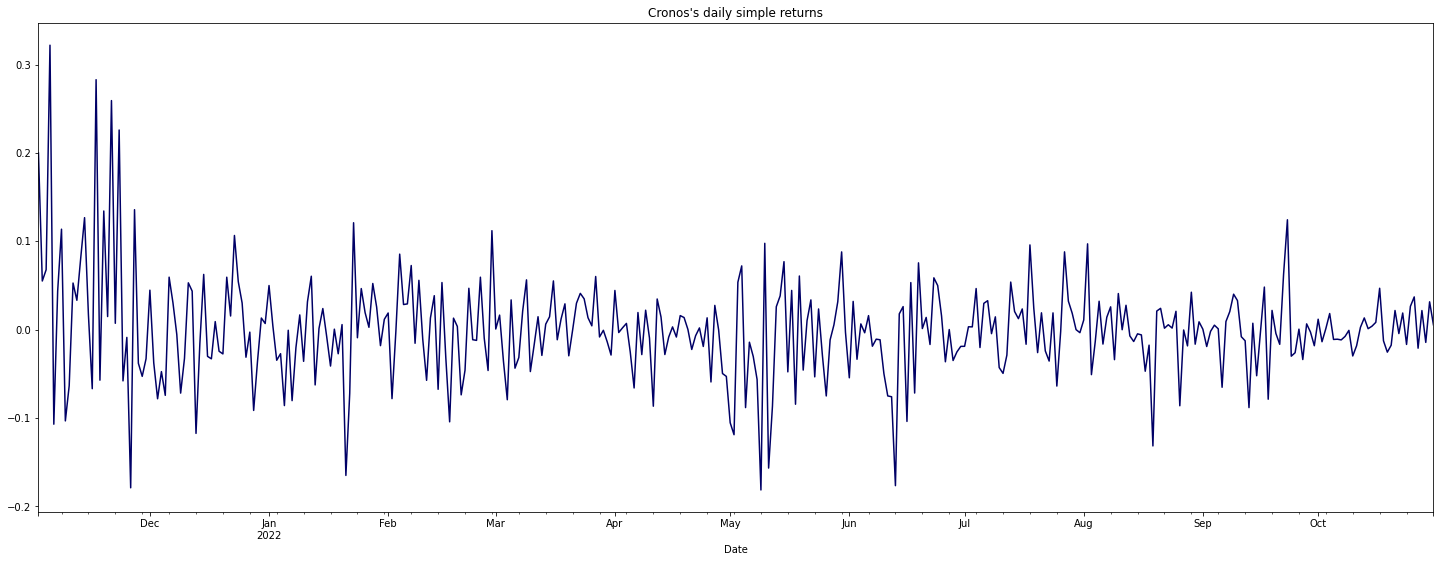

In [56]:
# Evolutia randentelor simple zilnice ale Cronos
cronos_simple_return.plot(label='Cronos\'s simple returns', title='Cronos\'s daily simple returns', color = '#000066') 

<AxesSubplot:title={'center':"Snowflake's daily simple returns"}, xlabel='Date'>

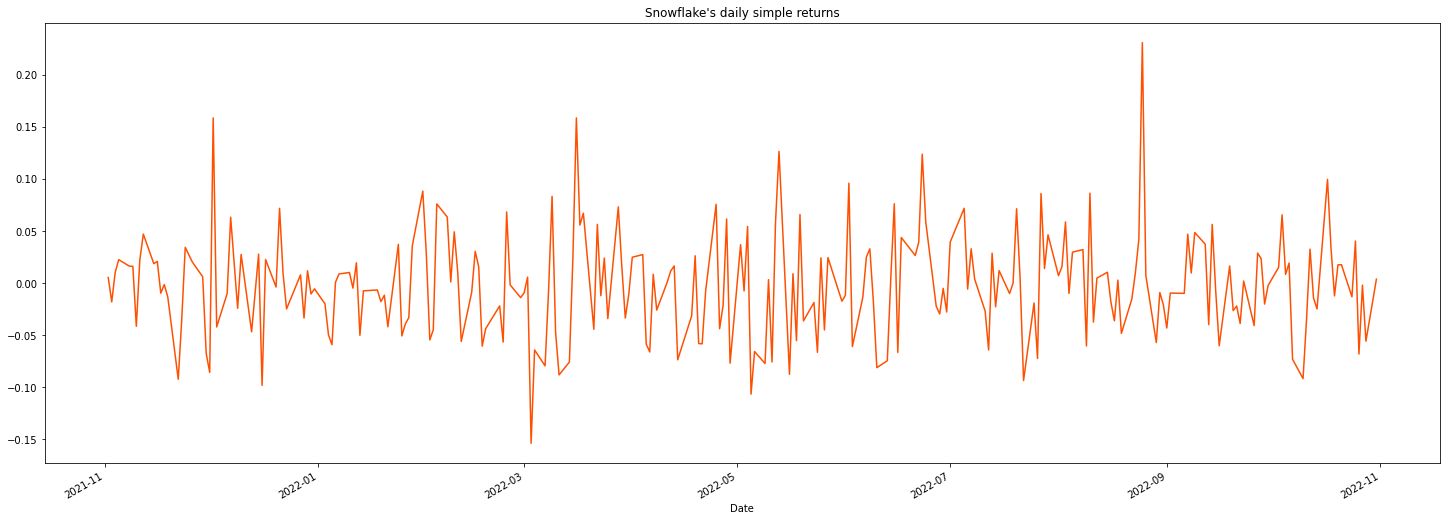

In [57]:
# Evolutia randamentelor simple zilnice ale Snowflake
snowflake_simple_return.plot(label='Snowflake\'s simple returns', title='Snowflake\'s daily simple returns', color = '#ff4f00')

<AxesSubplot:title={'center':"Cronos's daily log-returns"}, xlabel='Date'>

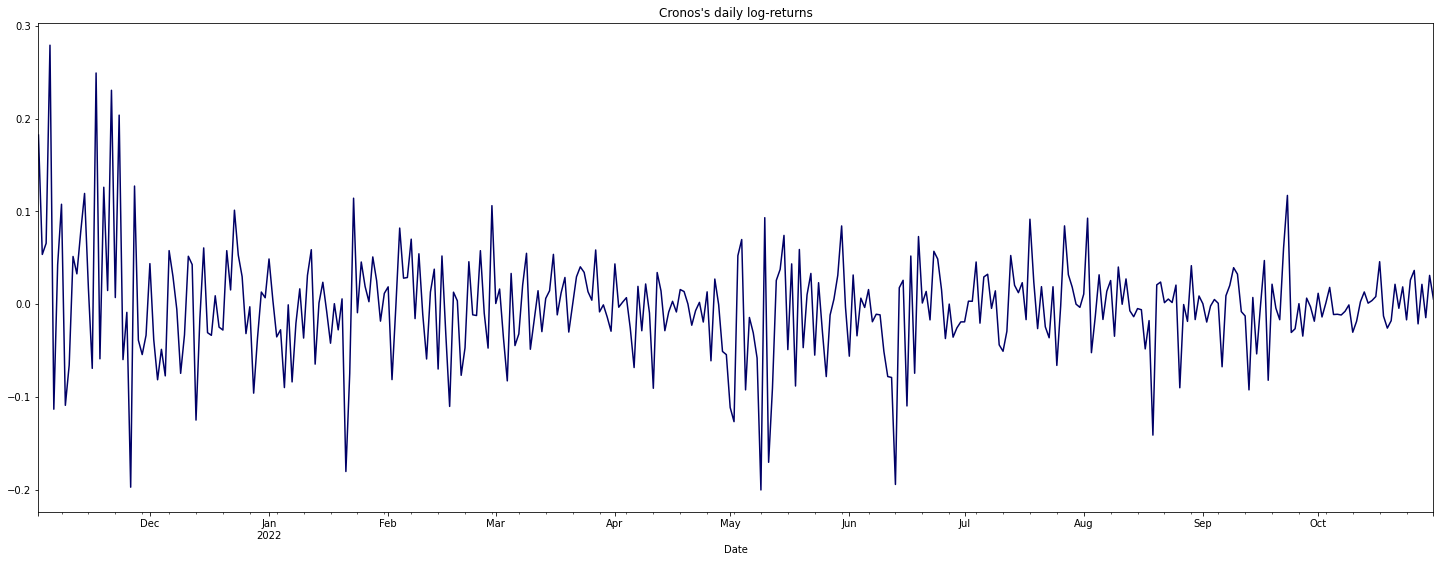

In [58]:
# Evolutia daily log-return ale Cronos
cronos_log_return.plot(label='Cronos\'s log-returns', title='Cronos\'s daily log-returns', color = '#000066') 

<AxesSubplot:title={'center':"Snowflake's daily log-returns"}, xlabel='Date'>

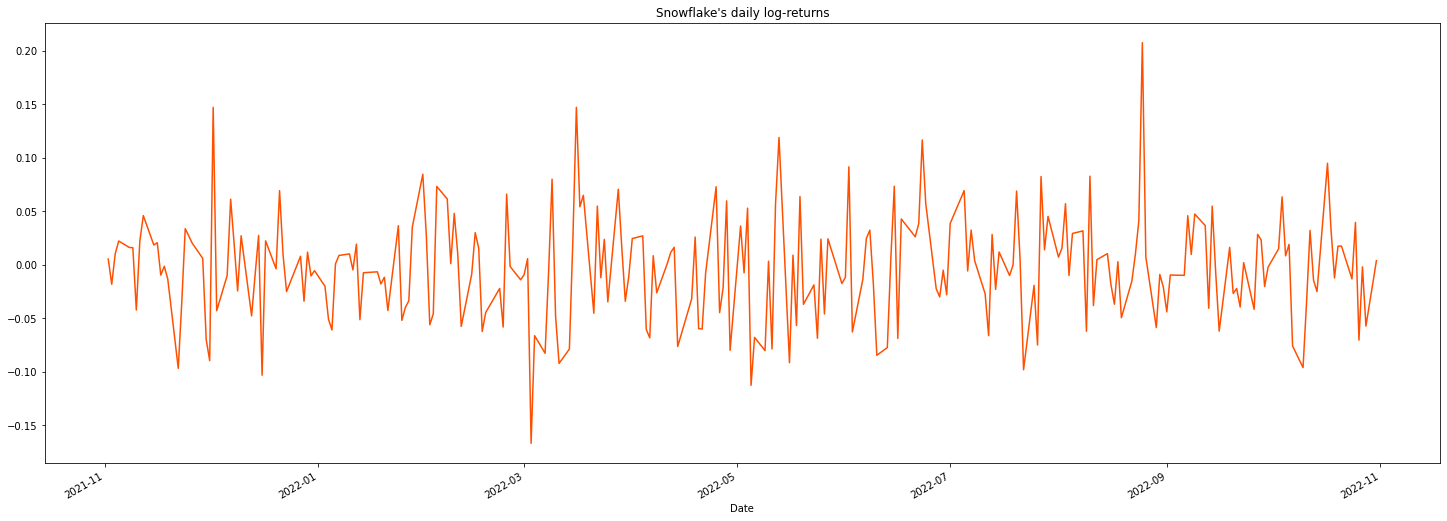

In [59]:
# Evolutia log-randamentelor zilnice ale Snowflake
snowflake_log_return.plot(label='Snowflake\'s log-returns', title='Snowflake\'s daily log-returns', color = '#ff4f00')

In [60]:
from arch.unitroot import VarianceRatio
import scipy.stats as stat
import scipy

# Ipoteza de piata eficienta
# Testul ADF
from arch.unitroot import ADF
adf = ADF(np.log(df_cronos['Close']))
print(adf.summary().as_text())

# Testul KPSS
from arch.unitroot import KPSS
series = np.log(df_cronos['Close'])
kpss = KPSS(series)
print(kpss.summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                 -0.663
P-value                         0.856
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  2.793
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [61]:
# Individual Variance Ratio Tests
x = np.asarray(df_cronos['Close'])
x = np.log(x)
N=len(x)
vr_1=[]
vrt = []
w=[]
varvrt = []
zvrt = []
q = []
lcl=[]
ucl=[]
vr_1=[]
p_value=[]
stderr=[]
alpha=0.05
k=5

def VRTest():
    for ii in range (1, k+1):
        a=2**ii
        q.append(a)
        vr = VarianceRatio(x, a)
        vrt.append(vr.vr)
        se=np.sqrt(vr._stat_variance)/np.sqrt(vr._nobs-1)
        stderr.append(se)
        lower=vr.vr-stat.norm.ppf(1-alpha/2)*se
        upper=vr.vr+stat.norm.ppf(1-alpha/2)*se
        one=1
        zvrt.append(vr.stat)
        lcl.append(lower)
        ucl.append(upper)
        vr_1.append(one)
        p_value.append(vr.pvalue)

    return vrt,p_value,zvrt,q,stderr 


VRTest()
results=pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results['q']=q
results['VR test']=vrt
results['Std. Error']=stderr
results['z statistic']=zvrt
results['P-value']=p_value
results

,q,VR test,Std. Error,z statistic,P-value
0,2,0.935673,0.064513,-0.997121,0.318706
1,4,1.065932,0.131316,0.502085,0.615607
2,8,1.130684,0.217622,0.600510,0.548166
3,16,1.318797,0.316074,1.008617,0.313158
4,32,1.062498,0.436001,0.143345,0.886018


In [62]:
# Multiple Variance Ratio Test - Studentized Maximum Modulus
z=abs(results["z statistic"]).max()
alpha_star=1-(1-alpha)**(1/k)
alpha_star
z_star=stat.norm.ppf(1-alpha_star/2)
z_star


mvr=pd.DataFrame(columns=['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic']=z
mvr['Critical z']=z_star
if z<z_star:
    mvr['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision']="Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,1.008617,2.568763,Cannot reject the null hypothesis of random walk


In [63]:
# Multiple Variance Ratio Test - Wald Test
cov1=np.zeros((k,k))
q=np.asarray(q)

for i in range (0,k-1):
    for j in range (i+1,k):
        cov1[i][j]=2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2=np.transpose(cov1)
cov=cov1+cov2

for i in range (0,k):
     cov[i][i]=2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test=np.matmul(np.asarray(vrt)-1,np.linalg.inv(cov))            
Wald_Test=N*np.matmul(Wald_Test,np.transpose(np.asarray(vrt)-1))
p_val= 1-stat.chi2.cdf(Wald_Test,k)
mvrw=pd.DataFrame(columns=['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test']=Wald_Test
mvrw['Critical Chi2']=stat.chi2.ppf(alpha/2,k)
mvrw['P-value']=p_val
if p_val>0.05:
    mvrw['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision']="Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,19.937007,0.831212,0.001284,Reject the null hypothesis of random walk


#### Conform testului Wald, actiunile Snowflake Inc respectă ipoteza de piață eficientă în formă slabă pentru perioada de timp analizata.

In [64]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(snowflake_log_return, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,7.526713,0.820937
